# Spline Cúbico

PONTO X | VALOR SPLINE | VALOR ESPERADO
2 & -8.81 & -9.00 \\
3.5 & -18.21 & -18.38 \\
6 & 39.69 & 31.00 \\
7 & 105.55 & 91.00 \\


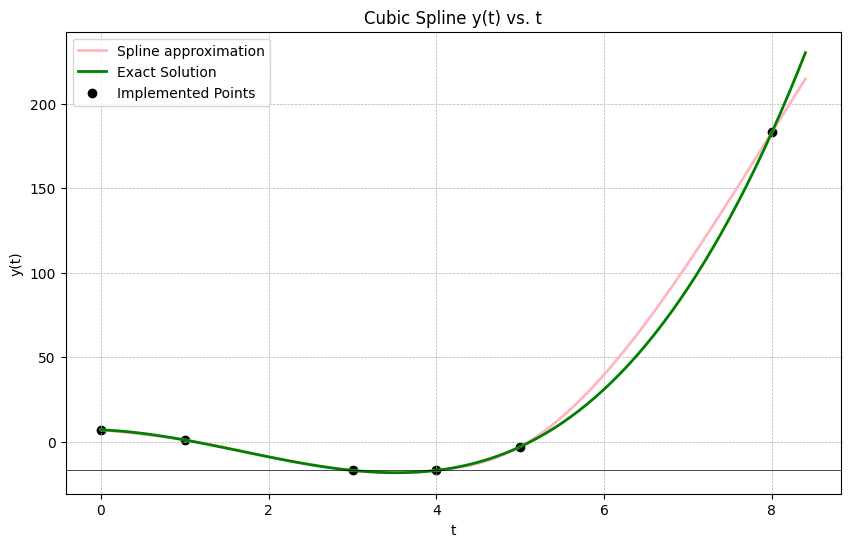

In [ ]:
from typing import Tuple, List
import bisect
import matplotlib.pyplot as plt

def funcao_certa(x):
    return (x**3 - 5*x**2 - 2*x + 7)

def encontrar_y_novo(x_novo, x_vals, y_vals):
    y_novo = []  # Lista para armazenar os valores correspondentes de y

    for x in x_novo:
        # Encontra o índice do valor de x em x_vals
        index = x_vals.index(x)

        # Adiciona o valor correspondente de y em y_vals à lista y_novo
        y_novo.append(y_vals[index])

    return y_novo

def testspline(test_x, x_novo):
    test_y = [funcao_certa(y) for y in test_x]
    spline = compute_spline(test_x, test_y)

    for i, x in enumerate(test_x):
        assert abs(test_y[i] - spline(x)) < 1e-8, f'Error at {x}, {test_y[i]}'
    y_real = [funcao_certa(y) for y in x_novo]

    x_vals = [v / 10 for v in range(0, 85, 1)]
    y_vals = [spline(y) for y in x_vals]
    y_certo = [funcao_certa(y) for y in x_vals]
    y_spline = encontrar_y_novo(x_novo, x_vals, y_vals)


    print("PONTO X | VALOR SPLINE | VALOR ESPERADO")
    for x, y_s, y_r in zip(x_novo, y_spline, y_real):
        print(f"{x} & {y_s:.2f} & {y_r:.2f} \\\\")

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, color='lightpink', linewidth=2, label='Spline approximation')  # Linha rosa clara
    plt.plot(x_vals, y_certo, color='green', linewidth=2, label='Exact Solution')  # Linha rosa clara
    plt.scatter(test_x, test_y, color='black', label='Implemented Points')  # Pontos pretos

    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('Cubic Spline y(t) vs. t')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Ativa o grid para ambos os eixos
    plt.axhline(-17, color='black',linewidth=0.5) # Adiciona linha horizontal para o eixo y
    plt.show()

def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)

    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline

#teste para a equação de tercerio grau: x^3 - 5x^2 - 2x + 7
test_x = [0,1,3,4,5,8]
x_teste = [2,3.5,6,7] # pode ser no max o valor final do test_x mais 0.4

testspline(test_x, x_teste)

# Runge kutta


In [ ]:
#############################################################################
def phi(t,y,dt,f):
    # define discretization function

    k1 = f(t, y)
    k2 = f(t+dt/2, y + dt/2*k1)
    k3 = f(t+dt/2, y + dt/2*k2)
    k4 = f(t+dt, y + dt*k3)
#    return k1     # euler
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)   # classical runge-kutta RK-44
############################################################################
############################################################################
def f(t, y):
    # input n-dim right hand side: f=(f0,f1,...,fn-1)
    # ATTENTION: Python arrays and lists start at index "0" !!!!

    f0 =  y[1]
    f1 = -y[0]

    return np.array([f0,f1])
############################################################################
############################################################################
def oneStepMethod(t0, y0, T, n):
        # compute approximate solution to the initial value problem
        t_n = [t0]           # time interval: t in [t0,T]
        y_n = [y0[0]]  # initial condition

        h = (T - t0) / n        # integration time step

        while t_n[-1] < T:
            # advance solution in time
            y_n.append(y_n[-1] + h * phi(t_n[-1], [y_n[-1]], h, f)) # phi(t, y, h, f) -> phi(t, [y], h, f)
            t_n.append(t_n[-1] + h)     # update clock
            h = min(h, T - t_n[-1])
        y_n = np.array(y_n)

        return (T - t0) / n, y_n[-1]
############################################################################
def ye(t):
    # exact solution
    return math.cos(t)
############################################################################
############################################################################
def main():
    # input math model data
    t0=0; y0=[1,0];  # initial condition
    T=10             # final time

    # input numerical method data
    m=9;  h=[0]*m;   # number of cases to run. Initialize list of time steps
    yn=[y0]*m;       # initialize list of approximations

    print("ORDER BEHAVIOR CONVERGENCE TABLE");

    # case loop
    for i in range(1,m+1): # run m times same code with h progressively small
        n=16*2**(i-1);     # number of time steps in i-th case

        h[i-1],yn[i-1]=oneStepMethod(t0,y0,T,n);

        # verification via manufactured solution stragegy
        # convergence table to verify the method correct implementation
        e=p=q=r=0;
        if i>1:
            q = abs((ye(T)-yn[i-2][0])/(ye(T)-yn[i-1][0]));
            r = h[i-2]/h[i-1];

            p = math.log(q)/math.log(r);

            e = abs(ye(T)-yn[i-1][0])
        print("%5d & %9.3e & %9.3e & %9.3e \\\\" % (n,h[i-1],e,p));

    print(" ");

    # verification of the order without using/knowing the exact solution
    # convergence table to determine the behavior of the method for our problem

main()


ORDER BEHAVIOR CONVERGENCE TABLE


IndexError: list index out of range

# Solução manufaturada

   INTERAÇÃO | H | STEPSIZE | ERRO | ORDEM
   16 & 6.250e-01 & 6.250e-01 & 0.000e+00 & 0.000e+00  \\
   32 & 3.125e-01 & 9.375e-01 & 4.356e-01 & 3.979e+00  \\
   64 & 1.562e-01 & 1.094e+00 & 2.732e-02 & 3.995e+00  \\
  128 & 7.812e-02 & 1.172e+00 & 1.709e-03 & 3.999e+00  \\
  256 & 3.906e-02 & 1.211e+00 & 1.068e-04 & 4.000e+00  \\
  512 & 1.953e-02 & 1.230e+00 & 6.678e-06 & 4.000e+00  \\
 1024 & 9.766e-03 & 1.240e+00 & 4.174e-07 & 4.000e+00  \\
 2048 & 4.883e-03 & 1.245e+00 & 2.610e-08 & 3.999e+00  \\
 4096 & 2.441e-03 & 1.248e+00 & 1.593e-09 & 4.034e+00  \\
 


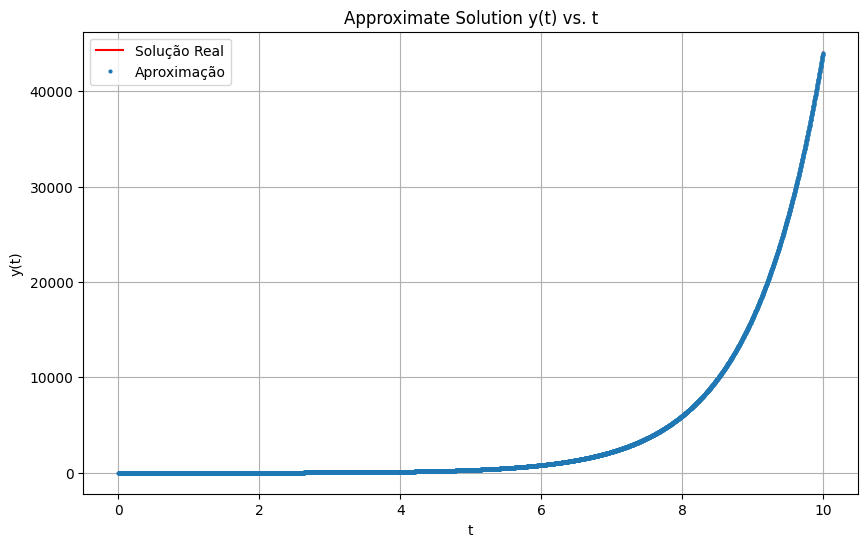

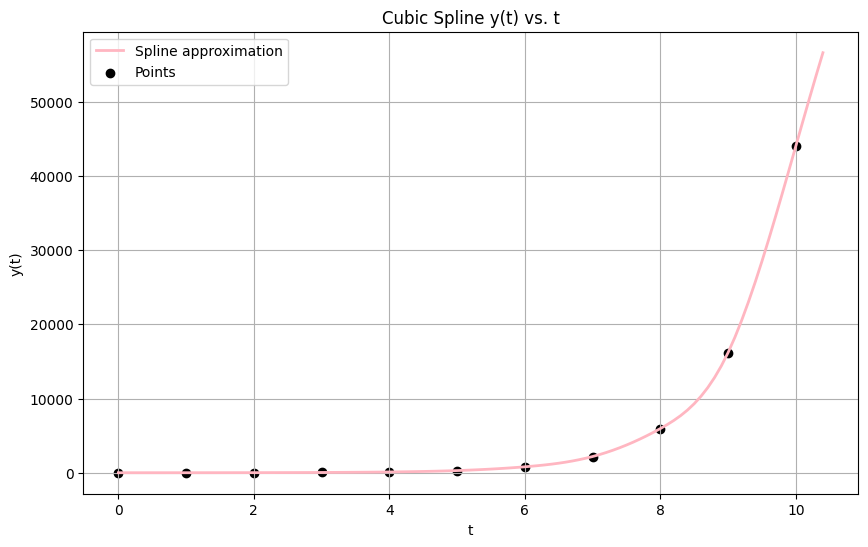

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Tuple, List
import bisect

##  Spline

def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)

    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline

## Plota o Spline-cubic

def testspline(test_x, test_y):
    spline = compute_spline(test_x, test_y)

    for i, x in enumerate(test_x):
        assert abs(test_y[i] - spline(x)) < 1e-8, f'Error at {x}, {test_y[i]}'

    x_vals = [v / 10 for v in range(0, 105, 1)]
    y_vals = [spline(y) for y in x_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, color='lightpink', linewidth=2, label='Spline approximation')  # Linha rosa clara
    plt.scatter(test_x, test_y, color='black', label='Points')  # Pontos pretos
    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('Cubic Spline y(t) vs. t')
    plt.legend()
    plt.grid(True)
    plt.show()

## RUNGE-KUTTA

## FUNÇÃO QUE SERÁ TRABALHADA
def f(t, y):
    return t + y

def phi(t, y, dt, f):
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2*k1)
    k3 = f(t + dt/2, y + dt/2*k2)
    k4 = f(t + dt, y + dt*k3)
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)

def f2(t, y):
    f0 = y[1]
    f1 = 2 * math.exp(t) - 1
    return np.array([f0, f1])


def phi2(t, y, dt):
    k1 = f2(t, y)
    k2 = f2(t + dt/2, y + dt/2*k1)
    k3 = f2(t + dt/2, y + dt/2*k2)
    k4 = f2(t + dt, y + dt*k3)
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)

def oneStepMethod(t0, y0, T, n):
    t_n = [t0]
    y_n = [y0[0]]
    y_erro = [np.array(y0)]
    h = (T - t0) / n

    while t_n[-1] < T:
        y_n.append(y_n[-1] + h*phi(t_n[-1], y_n[-1], h, f))
        y_erro.append(y_erro[-1] + h*phi2(t_n[-1], y_erro[-1], h))
        t_n.append(t_n[-1] + h)
        h = min(h, T - t_n[-1])
    y_erro = np.array(y_erro)

    return np.array(t_n), np.array(y_n), y_erro[-1]

def obter_valores_aproximacao(t_values, y_values):
    t_inteiros = np.arange(t_values[0][0], t_values[0][-1]+1)
    y_aproximados = np.interp(t_inteiros, t_values[0], y_values[0])
    y_inteiros = np.round(y_aproximados).astype(float)
    return t_inteiros, y_inteiros

def ye(t):
    # exact solution
    return 2 * math.exp(t) - t - 1

def main():
    t0 = 0
    y0 = [1,6]
    T = 10 ## TAMANHO DO MAXIMO DO INTERVALO DE TEMPO
    m = 9  ## NÚMERO DE ITERAÇÕES
    h = [0] * m
    yn = [y0] * m

    t_values = []
    y_values = []
    X_spline = []
    Y_spline = []

    print("   INTERAÇÃO | H | STEPSIZE | ERRO | ORDEM")

    sum_h = 0  # Inicializa a soma de r

    for i in range(1, m+1):
        n = 16 * 2**(i-1)
        t, y, yn[i-1] = oneStepMethod(t0, y0, T, n)
        if i == m:
            t_values.append(t)
            y_values.append(y)

        h[i-1] = (T - t0) / n

        e = p = q = r = 0
        if i > 1:
            q = abs((ye(T) - yn[i-2][0]) / (ye(T) - yn[i-1][0]))
            r = h[i-2] / h[i-1]
            p = math.log(q) / math.log(r)
            e = abs(ye(T) - yn[i-1][0])

        sum_h += h[i-1]

        print("%5d & %9.3e & %9.3e & %9.3e & %9.3e  \\\\" % (n, h[i-1], sum_h, e, p))

    print(" ")

    X_spline, Y_spline = obter_valores_aproximacao(t_values, y_values)
    return t_values, y_values, X_spline, Y_spline

## Plota o runge-kutta

def plot_solution(t_values, y_values):
    plt.figure(figsize=(10, 6))
    ## FUNÇÃO CORRETA
    x_values = np.linspace(min(t_values[0]), max(t_values[0]), 1000)
    y_resultado = 2 * np.exp(x_values) - x_values - 1
    plt.plot(x_values, y_resultado, color='red', linestyle='-', label='Solução Real')

    for t, y in zip(t_values, y_values):
        plt.plot(t, y, marker='o', markersize=2, linestyle='None', label='Aproximação')

    plt.xlabel('t')
    plt.ylabel('y(t)')
    plt.title('Approximate Solution y(t) vs. t')
    plt.legend()
    plt.grid(True)
    plt.show()

t_values, y_values, X_spline, Y_spline = main()
plot_solution(t_values, y_values)
testspline(X_spline, Y_spline)


# De Sitter Universe

INTERAÇÃO | H | STEPSIZE | ERRO | ORDEM
16 & 8.750e-01 & 2.625e+00 & 2.108e+02 & ----------- \\
32 & 4.375e-01 & 3.062e+00 & 2.105e+01 & 3.323e+00 \\
64 & 2.188e-01 & 3.281e+00 & 1.654e+00 & 3.670e+00 \\
128 & 1.094e-01 & 3.391e+00 & 1.159e-01 & 3.836e+00 \\
256 & 5.469e-02 & 3.445e+00 & 7.668e-03 & 3.918e+00 \\
512 & 2.734e-02 & 3.473e+00 & 4.931e-04 & 3.959e+00 \\
1024 & 1.367e-02 & 3.486e+00 & 3.126e-05 & 3.979e+00 \\


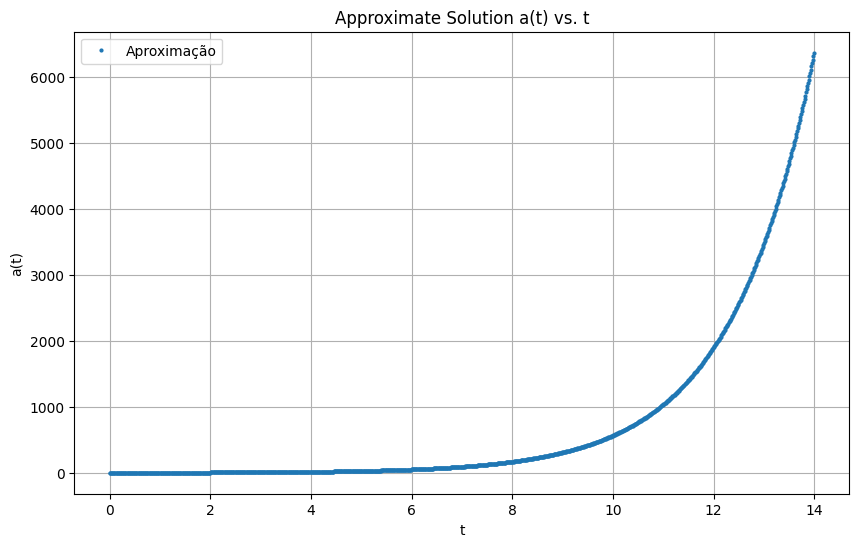

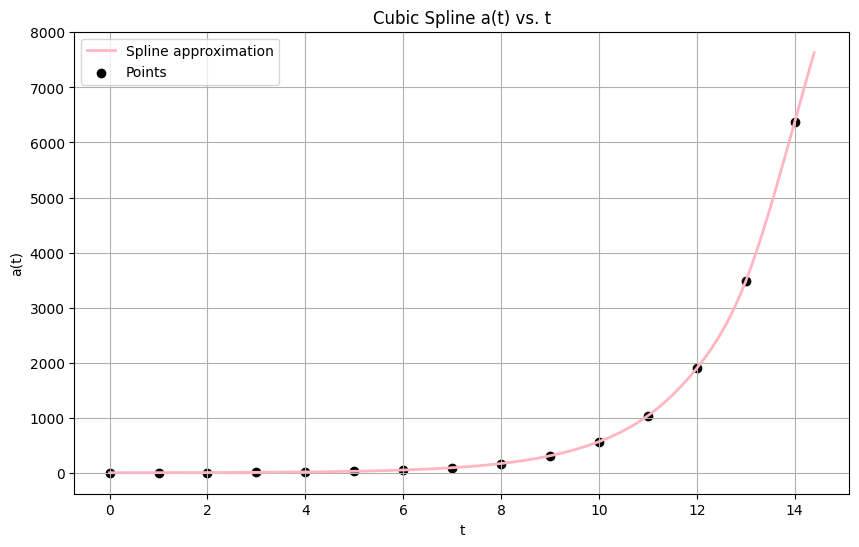

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from typing import Tuple, List
import bisect

##  Spline

def compute_changes(x: List[float]) -> List[float]:
    return [x[i+1] - x[i] for i in range(len(x) - 1)]

def create_tridiagonalmatrix(n: int, h: List[float]) -> Tuple[List[float], List[float], List[float]]:
    A = [h[i] / (h[i] + h[i + 1]) for i in range(n - 2)] + [0]
    B = [2] * n
    C = [0] + [h[i + 1] / (h[i] + h[i + 1]) for i in range(n - 2)]
    return A, B, C

def create_target(n: int, h: List[float], y: List[float]):
    return [0] + [6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) / (h[i] + h[i-1]) for i in range(1, n - 1)] + [0]

def solve_tridiagonalsystem(A: List[float], B: List[float], C: List[float], D: List[float]):
    c_p = C + [0]
    d_p = [0] * len(B)
    X = [0] * len(B)

    c_p[0] = C[0] / B[0]
    d_p[0] = D[0] / B[0]
    for i in range(1, len(B)):
        c_p[i] = c_p[i] / (B[i] - c_p[i - 1] * A[i - 1])
        d_p[i] = (D[i] - d_p[i - 1] * A[i - 1]) / (B[i] - c_p[i - 1] * A[i - 1])

    X[-1] = d_p[-1]
    for i in range(len(B) - 2, -1, -1):
        X[i] = d_p[i] - c_p[i] * X[i + 1]

    return X

def compute_spline(x: List[float], y: List[float]):
    n = len(x)
    if n < 3:
        raise ValueError('Too short an array')
    if n != len(y):
        raise ValueError('Array lengths are different')

    h = compute_changes(x)
    if any(v < 0 for v in h):
        raise ValueError('X must be strictly increasing')

    A, B, C = create_tridiagonalmatrix(n, h)
    D = create_target(n, h, y)

    M = solve_tridiagonalsystem(A, B, C, D)

    coefficients = [[(M[i+1]-M[i])*h[i]*h[i]/6, M[i]*h[i]*h[i]/2, (y[i+1] - y[i] - (M[i+1]+2*M[i])*h[i]*h[i]/6), y[i]] for i in range(n-1)]

    def spline(val):
        idx = min(bisect.bisect(x, val)-1, n-2)
        z = (val - x[idx]) / h[idx]
        C = coefficients[idx]
        return (((C[0] * z) + C[1]) * z + C[2]) * z + C[3]

    return spline

## Plota o Spline-cubic

def testspline(test_x, test_y):
    spline = compute_spline(test_x, test_y)

    for i, x in enumerate(test_x):
        assert abs(test_y[i] - spline(x)) < 1e-8, f'Error at {x}, {test_y[i]}'

    x_vals = [v / 10 for v in range(0, 145, 1)]
    y_vals = [spline(y) for y in x_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, color='lightpink', linewidth=2, label='Spline approximation')  # Linha rosa clara
    plt.scatter(test_x, test_y, color='black', label='Points')  # Pontos pretos
    plt.xlabel('t')
    plt.ylabel('a(t)')
    plt.title('Cubic Spline a(t) vs. t')
    plt.legend()
    plt.grid(True)
    plt.show()

# Aproximação

def obter_valores_aproximacao(t_values, y_values):
    t_inteiros = np.arange(t_values[0][0], t_values[0][-1]+1)
    y_aproximados = np.interp(t_inteiros, t_values[0], y_values[0])
    y_inteiros = np.round(y_aproximados).astype(float)
    return t_inteiros, y_inteiros

# RUNGE-KUTTA

# Constants
Lambda = 1.1  # Cosmological Constant
c = 1       # Speed of light in meters per second

  # a' = v
def f_a(a, v):
  return v

  # v' = (lambda * c²) * a / 3
def f_v(a, v):
  return  (Lambda * c**2 / 3) * a

def phi_deSitter(a, v, dt):

    k1 = f_a(a, v)
    l1 = f_v(a, v)

    k2 = f_a(a + dt/2 * k1, v + dt/2 * l1)
    l2 = f_v(a + dt/2 * k1, v + dt/2 * l1)

    k3 = f_a(a + dt/2 * k2, v + dt/2 * l2)
    l3 = f_v(a + dt/2 * k2, v + dt/2 * l2)

    k4 = f_a(a + dt * k3, v + dt * l3)
    l4 = f_v(a + dt * k3, v + dt * l3)

    phi_a = (k1 + 2 * k2 + 2 * k3 + k4)/6
    phi_v = (l1 + 2 * l2 + 2 * l3 + l4)/6

    return phi_a,  phi_v

def methodForSecondOrder(t0, a0, v0, T, n):
    t_n = [t0]
    a_n = [a0[0]]
    v_n = [v0[0]]
    h = (T - t0) / n

    while t_n[-1] < T:
      phi_a, phi_v = phi_deSitter(a_n[-1], v_n[-1], h)

                # list[-1] gets the last element in list
      a_n.append(a_n[-1] + h * phi_a)
      v_n.append(v_n[-1] + h * phi_v)

      t_n.append(t_n[-1] + h)
      h = min(h, T - t_n[-1])

    return np.array(t_n), np.array(a_n), np.array(v_n)


def plot_solution(t_values, y_values):
    plt.figure(figsize=(10, 6))

    ## FUNÇÃO CORRETA
    plt.plot(t_values, y_values, marker='o', markersize=2, linestyle='None', label='Aproximação')


    plt.xlabel('t')
    plt.ylabel('a(t)')
    plt.title('Approximate Solution a(t) vs. t')
    plt.legend()
    plt.grid(True)
    plt.show()


def main():
    t0 = 0
    a0 = [1.0, 0]  # Initial scale factor
    v0 = [1.0, 0]  # Initial rate of change of the scale factor
    T = 14  # Total time
    m = 7   # Number of steps1.2248684953 * 10 ⁻³⁵
    h = [0] * (m+1)
    erro = []
    order = []
    results_all = []
    steps = []
    t_values = []
    y_values = []
    X_spline = []
    Y_spline = []

    sum_h = []  # Inicializa a soma de r

    n = 2**2
    t_1, a_1, v_1 = methodForSecondOrder(t0, a0, v0, T, n)

    #i = 3
    n = 2**3
    t_n, a_n, v_n = methodForSecondOrder(t0, a0, v0, T, n)
    erro.append(np.linalg.norm(np.array(a_1 - a_n[-1])))
    order.append('-----------')
    steps.append(n)
    h[0] = (T - t0) / n
    sum_h.append(h[0])
    results_all.append(a_n)

    # print(int(64),'&',"&",f'{erro[3]:e}','&','-----------')

    for i in range(1, m+1):
        n = 16 * 2**(i-1)
        t_n, a_n, v_n = methodForSecondOrder(t0, a0, v0, T, n)
        if i == m:
            t_values.append(t_n)
            y_values.append(a_n)

        h[i] = (T - t0) / n

        erro.append(np.linalg.norm(np.array(results_all[-1][-1] - a_n[-1])))
        order.append((np.log(erro[-2]/erro[-1]))/np.log(2))
        steps.append(n)
        sum_h.append(sum_h[-1] + h[i])
        results_all.append(a_n)


    print("INTERAÇÃO | H | STEPSIZE | ERRO | ORDEM")
    print(int(steps[1]),'&',f'{h[1]:.3e}',"&",f'{sum_h[1]:.3e}',"&",f'{erro[1]:.3e}','&','-----------', '\\\\')
    for i in range(2,m+1):
      print(int(steps[i]), '&', f'{h[i]:.3e}', "&", f'{sum_h[i]:.3e}', "&", f'{erro[i]:.3e}', '&', f'{order[i]:.3e}', '\\\\')

    X_spline, Y_spline = obter_valores_aproximacao(t_values, y_values)
    return t_n, a_n, v_n, X_spline, Y_spline

t_values, a_values ,v_values, X_spline, Y_spline = main()
plot_solution(t_values, a_values)
testspline(X_spline, Y_spline)
